In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

Load Data

In [ ]:
df_english = pd.read_csv('/content/drive/MyDrive/code/LSTM-english-french-translation/small_vocab_en.csv', encoding='windows-1252', sep = '/t', names = ['english'])
df_french = pd.read_csv('/content/drive/MyDrive/code/LSTM-english-french-translation/small_vocab_fr.csv', encoding='windows-1252', sep = '/t', names = ['french'])

<ipython-input-6-03733472db76>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_english = pd.read_csv('/content/drive/MyDrive/code/LSTM-english-french-translation/small_vocab_en.csv', encoding='windows-1252', sep = '/t', names = ['english'])
<ipython-input-6-03733472db76>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_french = pd.read_csv('/content/drive/MyDrive/code/LSTM-english-french-translation/small_vocab_fr.csv', encoding='windows-1252', sep = '/t', names = ['french'])


Combine Data

In [ ]:
df = pd.concat([df_english, df_french], axis = 1)
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [ ]:
print("Total English Records = {}".format(len(df['english'])))
print("Total French Records = {}".format(len(df['french'])))

Data Cleaning

In [ ]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Remove Punctuations

In [ ]:
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [ ]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

Vocabulary Size

In [ ]:
english_words = []
french_words  = []

In [ ]:
# function to get the list of unique words
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)


df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

total_english_words  = len(english_words)
total_english_words

total_french_words = len(french_words)
total_french_words


350

Visualize Data Distribution

In [ ]:
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)

In [ ]:
english_words_counts = Counter(words)

In [ ]:
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [ ]:
fig = px.bar(x = english_words, y = english_counts)
fig.show()

Word Cloud of Data

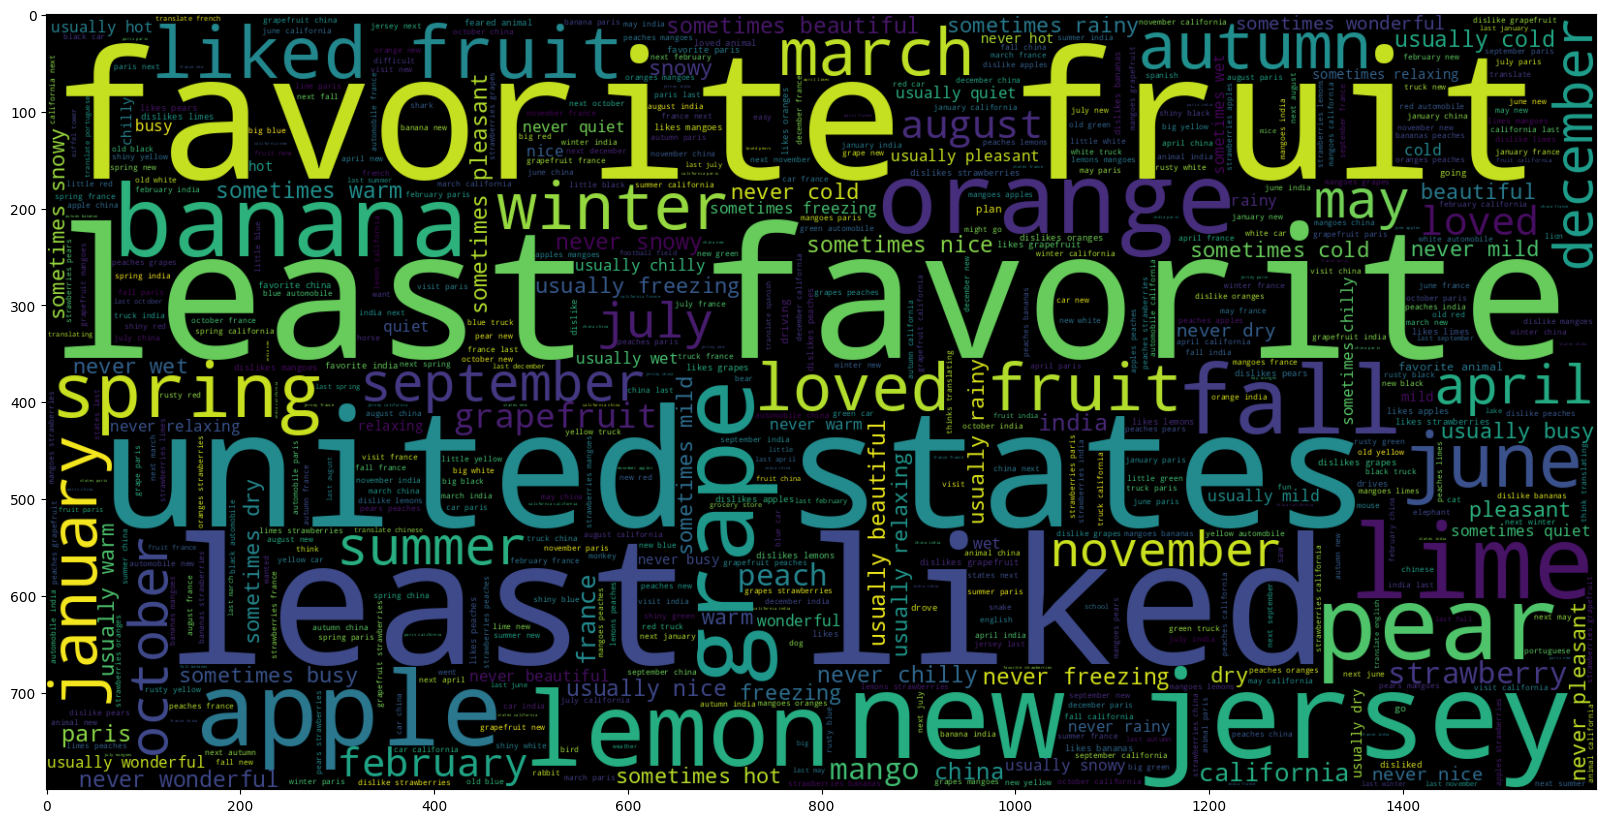

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


Distribution & Word Cloud of French Words

The maximum number of words in any document =  23


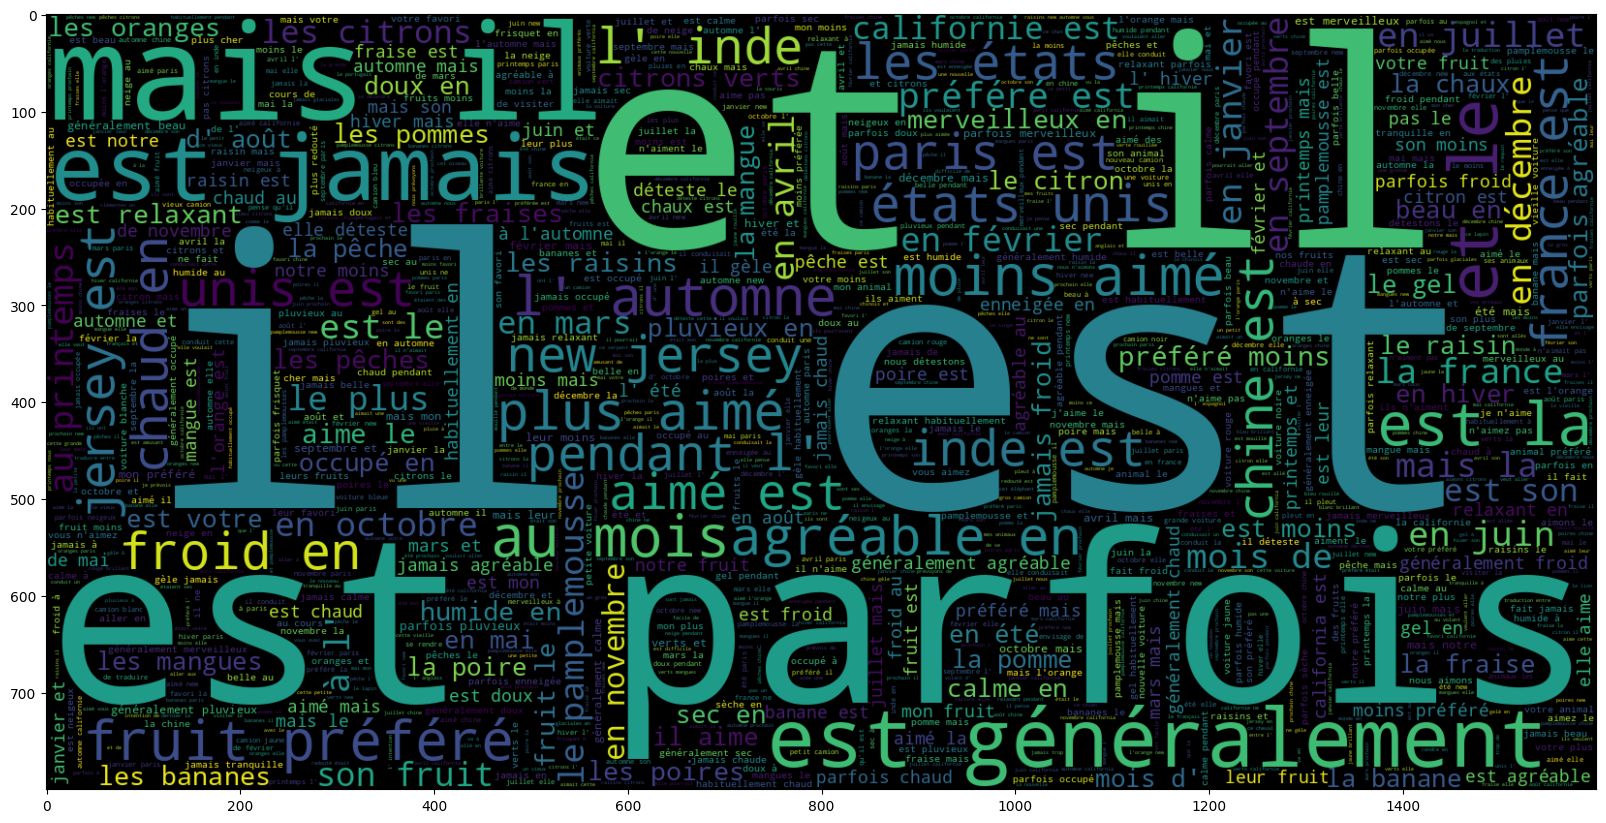

In [ ]:
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
words

french_words_counts = Counter(words)
french_words_counts


french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

french_words = []
french_counts = []

for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

fig = px.bar(x = french_words, y = french_counts)
fig.show()

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

Tokenize & Pad Data

In [ ]:
def tokenize_and_pad(x, maxlen):
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [ ]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

Vocab Sizes

In [ ]:
english_vocab_size = total_english_words + 1
french_vocab_size = total_french_words + 1

Split Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

Build Model

In [ ]:
model = Sequential()
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 23, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 23, 351)           90207     
 ributed)                                                        
                                                                 
Total params: 1192031 (4.55 MB)
Trainable params: 119203

Train Model

In [ ]:
y_train = np.expand_dims(y_train, axis = 2)
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 23s 107ms/step - loss: 2.7015 - accuracy: 0.4985 - val_loss: 2.1339 - val_accuracy: 0.5292
Epoch 2/10
110/110 [==============================] - 7s 63ms/step - loss: 1.8737 - accuracy: 0.5722 - val_loss: 1.6276 - val_accuracy: 0.5992
Epoch 3/10
110/110 [==============================] - 6s 55ms/step - loss: 1.4943 - accuracy: 0.6183 - val_loss: 1.3851 - val_accuracy: 0.6302
Epoch 4/10
110/110 [==============================] - 6s 57ms/step - loss: 1.2804 - accuracy: 0.6538 - val_loss: 1.2072 - val_accuracy: 0.6629
Epoch 5/10
110/110 [==============================] - 6s 57ms/step - loss: 1.1088 - accuracy: 0.6893 - val_loss: 1.0874 - val_accuracy: 0.6911
Epoch 6/10
110/110 [==============================] - 6s 58ms/step - loss: 0.9694 - accuracy: 0.7234 - val_loss: 0.9125 - val_accuracy: 0.7374
Epoch 7/10
110/110 [==============================] - 6s 59ms/step - loss: 0.8486 - accuracy: 0.7550 - val_loss: 0.8429 - val_accuracy: 0.75

Save Model

In [ ]:
model.save("weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Evaluate Performance

In [ ]:
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [ ]:
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [ ]:
for i in range(5):
  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - she drove that big green car         

Original French word - elle a conduit cette grosse voiture verte                

1/1 [==============================] - 3s 3s/step
Predicted French word - occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé occupé




Original English word - our least liked fruit is the banana but his least liked is the lemon 

Original French word - notre moins aimé des fruits est la banane mais son moins aimé est le citron        

1/1 [==============================] - 0s 28ms/step
Predicted French word - l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant l'éléphant




Original English word - california is sometimes cold during november but it is n